# Project 5: Influence of translation on Poetry Style Assessment

This notebook covers the comparation of the inherent stylistic properties of Shakespeare's Hamlet.
This work is conducted as a part of course _Natural Language Processing and Text Mining_ (521158S), taught in the _University of Oulu_ in autumn 2022

## Authors

-   Olli
    -   Insert
-   Saku
    -   Studentnummer
-   Joose
    -   i här

## Introduction

This project aims to investigate the structure of poetry in terms of original structure of the poems with respect to existing corpus. We shall concentrate on Chakspeare HAMLET, with a comparison between its original English version and French translation. We are comparing the preservation of inherent stylistic properties through this translation.

## Task 1

> 1. Write a script that allows you to retrieve the text corresponding to HAMLET (character) sayings in the manuscript, while discarding stopwords and numbering and any non-related text. Separate the sayings of HAMLET character at each act for both original text and translation.

Analyzation of Hamlet EN:


In [2]:
import nltk
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

file1 = open("HamletEN.txt", "r")


seperate = []

playEN = [[],
          [],
          [],
          [],
          []]

act = 0


# skips the play information
while True:
    line = file1.readline()
    if line:
        try:
            if (line[0]+line[1]+line[2]) == "ACT":
                break
            else:
                pass
        except IndexError:
            pass

# get sentences. Contains stage directions
while True:
    line = file1.readline()
    if line:
        try:
            if (line[0]+line[1]+line[2]) == "ACT":
                act += 1
            if (line[0]+line[1]+line[2]+line[3]+line[4]+line[5]) == "HAMLET":
                if line.split("HAMLET", 1)[1] != "\n":
                    seperate.append(line.split("HAMLET", 1)[1].rstrip())
                line = file1.readline()
                while line != '\n':
                    seperate.append(line.rstrip())
                    line = file1.readline()
                thisLine = ' '.join(seperate)
                playEN[act].append(thisLine)
                seperate = []
        except IndexError:
            pass
    else:
        file1.close()
        break


# remove special characters except brackets which contain stage direction
whitelist = set(
    'abcdefghijklmnopqrstuvwxyz\[ \]\-- ABCDEFGHIJKLMNOPQRSTUVWXYZ')

noSpecialCharPrepEN = [["".join(filter(whitelist.__contains__, x)) for x in playEN[0]],
                       ["".join(filter(whitelist.__contains__, x))
                        for x in playEN[1]],
                       ["".join(filter(whitelist.__contains__, x))
                        for x in playEN[2]],
                       ["".join(filter(whitelist.__contains__, x))
                        for x in playEN[3]],
                       ["".join(filter(whitelist.__contains__, x)) for x in playEN[4]]]

# Replace "--" with a whitespace
noSpecialCharEN = [[re.sub("[--]", " ", x).strip() for x in noSpecialCharPrepEN[0]],
                   [re.sub("[--]", " ", x).strip()
                    for x in noSpecialCharPrepEN[1]],
                   [re.sub("[--]", " ", x).strip()
                    for x in noSpecialCharPrepEN[2]],
                   [re.sub("[--]", " ", x).strip()
                    for x in noSpecialCharPrepEN[3]],
                   [re.sub("[--]", " ", x).strip() for x in noSpecialCharPrepEN[4]]]


# remove stage direction
noDirectPlayPrepEN = [[re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in noSpecialCharEN[0]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip()
                       for x in noSpecialCharEN[1]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip()
                       for x in noSpecialCharEN[2]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip()
                       for x in noSpecialCharEN[3]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in noSpecialCharEN[4]]]

# Removes extra whitespaces
noDirectPlayEN = [[re.sub(' +', ' ', x).strip() for x in noDirectPlayPrepEN[0]],
                  [re.sub(' +', ' ', x).strip()
                   for x in noDirectPlayPrepEN[1]],
                  [re.sub(' +', ' ', x).strip()
                   for x in noDirectPlayPrepEN[2]],
                  [re.sub(' +', ' ', x).strip()
                   for x in noDirectPlayPrepEN[3]],
                  [re.sub(' +', ' ', x).strip() for x in noDirectPlayPrepEN[4]]]


# make everything lower case
allLowerEN = [[x.lower() for x in noDirectPlayEN[0]],
              [x.lower() for x in noDirectPlayEN[1]],
              [x.lower() for x in noDirectPlayEN[2]],
              [x.lower() for x in noDirectPlayEN[3]],
              [x.lower() for x in noDirectPlayEN[4]]]

# tokenize
tokensEN = [[nltk.word_tokenize(x) for x in allLowerEN[0]],
            [nltk.word_tokenize(x) for x in allLowerEN[1]],
            [nltk.word_tokenize(x) for x in allLowerEN[2]],
            [nltk.word_tokenize(x) for x in allLowerEN[3]],
            [nltk.word_tokenize(x) for x in allLowerEN[4]]]

# remove stopwords
stop_wordsEN = set(line.strip()
                   for line in open('stop_words_english.txt', encoding="utf8"))
noStopwEN = [[[t for t in x if t not in stop_wordsEN] for x in tokensEN[0]],
             [[t for t in x if t not in stop_wordsEN] for x in tokensEN[1]],
             [[t for t in x if t not in stop_wordsEN] for x in tokensEN[2]],
             [[t for t in x if t not in stop_wordsEN] for x in tokensEN[3]],
             [[t for t in x if t not in stop_wordsEN] for x in tokensEN[4]]]

# lemmatization
lemmatizer = WordNetLemmatizer()
lemmaEN = [[[lemmatizer.lemmatize(t) for t in x] for x in noStopwEN[0]],
           [[lemmatizer.lemmatize(t) for t in x] for x in noStopwEN[1]],
           [[lemmatizer.lemmatize(t) for t in x] for x in noStopwEN[2]],
           [[lemmatizer.lemmatize(t) for t in x] for x in noStopwEN[3]],
           [[lemmatizer.lemmatize(t) for t in x] for x in noStopwEN[4]]]

try:
    with open('lemmaEN.pickle', 'wb') as f:
        pickle.dump(lemmaEN, f)
except:
    print("Error writing to lemmaEN.pickle")

# remove act and line seperation
wordsEN = []
for act in lemmaEN:
    for line in act:
        for word in line:
            wordsEN.append(word)

# unique words only
def unique(list1):

    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list


uniqueEN = unique(wordsEN)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\antik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\antik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Analyzation of Hamlet FR


In [23]:
import spacy
from spacy.tokenizer import Tokenizer
import fr_core_news_md  # HOX, python -m spacy download fr_core_news_md
nlp = spacy.load('fr_core_news_md')

file1 = open("HamletFR.txt", "r", encoding="utf8")


playFR = [[],
          [],
          [],
          [],
          []]

act = 0

# skips the play information
while True:
    line = file1.readline()
    if line:
        try:
            if (line[0]+line[1]+line[2]+line[3]) == "ACTE":
                break
            else:
                pass
        except IndexError:
            pass

# get sentences
while True:
    line = file1.readline()
    if line:
        try:
            if (line[0]+line[1]+line[2]+line[3]) == "ACTE":
                act += 1
            if (line[0]+line[1]+line[2]+line[3]+line[4]+line[5]) == "HAMLET":
                if line.split("— ", 1)[1] != "\n":
                    playFR[act].append(line.split("— ", 1)[1].rstrip())
                line = file1.readline()
                while line and line != '\n':
                    playFR[act].append(line.rstrip())
                    line = file1.readline()
        except IndexError:
            pass
    else:
        file1.close()
        break

# remove stagedirections
noDirectPlayFR = [[re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in playFR[0]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip()
                   for x in playFR[1]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip()
                   for x in playFR[2]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip()
                   for x in playFR[3]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in playFR[4]]]


# remove special characters
whitelist = set(
    'abcdefghijklmnopqrstuvwxyzàâèéêëîïôùûüç\'- ÀÂÈÉÊËÎÏÔABCDEFGHIJKLMNOPQRSTUVWXYZ')

noSpecialCharPrepFR = [[''.join(filter(whitelist.__contains__, x)) for x in noDirectPlayFR[0]],
                       [''.join(filter(whitelist.__contains__, x))
                        for x in noDirectPlayFR[1]],
                       [''.join(filter(whitelist.__contains__, x))
                        for x in noDirectPlayFR[2]],
                       [''.join(filter(whitelist.__contains__, x))
                        for x in noDirectPlayFR[3]],
                       [''.join(filter(whitelist.__contains__, x)) for x in noDirectPlayFR[4]]]

noSpecialCharFR = [[re.sub(' +', ' ', x).strip() for x in noSpecialCharPrepFR[0]],
                   [re.sub(' +', ' ', x).strip()
                    for x in noSpecialCharPrepFR[1]],
                   [re.sub(' +', ' ', x).strip()
                    for x in noSpecialCharPrepFR[2]],
                   [re.sub(' +', ' ', x).strip()
                    for x in noSpecialCharPrepFR[3]],
                   [re.sub(' +', ' ', x).strip() for x in noSpecialCharPrepFR[4]]]

# make everything lower case

allLowerFR = [[x.lower() for x in noSpecialCharFR[0]],
              [x.lower() for x in noSpecialCharFR[1]],
              [x.lower() for x in noSpecialCharFR[2]],
              [x.lower() for x in noSpecialCharFR[3]],
              [x.lower() for x in noSpecialCharFR[4]]]

# tokenize 55play

tokenizer = Tokenizer(nlp.vocab)
tokensFR = [[[t.text for t in tokenizer(x)] for x in allLowerFR[0]],
            [[t.text for t in tokenizer(x)] for x in allLowerFR[1]],
            [[t.text for t in tokenizer(x)] for x in allLowerFR[2]],
            [[t.text for t in tokenizer(x)] for x in allLowerFR[3]],
            [[t.text for t in tokenizer(x)] for x in allLowerFR[4]]]

# remove stopwords

stop_wordsFR = set(line.strip()
                   for line in open('stop_words_french.txt', encoding="utf8"))
noStopwFR = [[[t for t in x if t not in stop_wordsFR and t != ' '] for x in tokensFR[0]],
             [[t for t in x if t not in stop_wordsFR and t != ' ']
                 for x in tokensFR[1]],
             [[t for t in x if t not in stop_wordsFR and t != ' ']
                 for x in tokensFR[2]],
             [[t for t in x if t not in stop_wordsFR and t != ' ']
                 for x in tokensFR[3]],
             [[t for t in x if t not in stop_wordsFR and t != ' '] for x in tokensFR[4]]]


# lemmatization. Removes act and line seperation

lemmaFR = []
wordsFR = []

for act in noStopwFR:
    act_list = []
    for line in act:
        line_list = []
        for word in line:
            doc = nlp(word)
            for token in doc:
                line_list.append(token.lemma_)
                wordsFR.append(token.lemma_)
        act_list.append(line_list)
    lemmaFR.append(act_list)

try:
    with open('lemmaFR.pickle', 'wb') as f:
        pickle.dump(lemmaFR, f)
except:
    print("Error writing to lemmaFR.pickle")


uniqueFR = unique(wordsFR)


## Task 2

> 2.  Use appropriate Tokenizer to perform the standard preprocessing pipeline (eliminate stopwords, numbers, uncommon characters,..) and recover the root form of individual words using WordNet lemmatizer. Generate the corresponding vocabulary for both English and French corpus and save it a database. Compare the size of the vocabulary of English Corpus and French corpus.


In [ ]:
print(len(uniqueEN))
print(len(uniqueFR))

2047
5


## Task 3

> 3. Use NLTK tokenizer to distinguish various tokens in each text and suggest a script that calculates average length per line in terms of number of characters, and determine the distribution of the lengths after histogram illustration (you may consult NLTK online book for examples). Draw on the same plot the distribution of English and French corpus.


<AxesSubplot: ylabel='Count'>

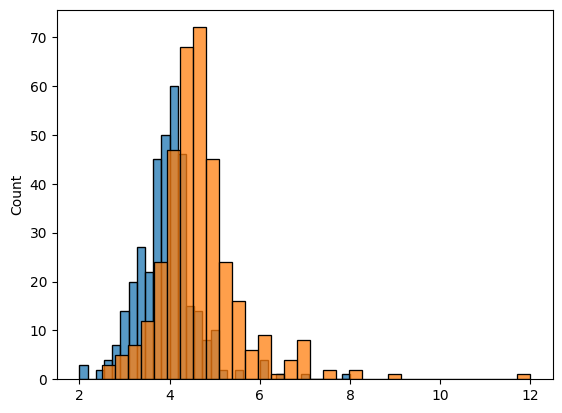

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


averagesEN = []
length = 0

for act in tokensEN:
    for line in act:
        for word in line:
            length += len(word)
        averagesEN.append(round(length / len(line), 2))
        length = 0

averagesFR = []
length = 0

for act in tokensFR:
    for line in act:
        for word in line:
            length += len(word)
        averagesFR.append(round(length / len(line), 2))
        length = 0

fig, ax = plt.subplots()
q25, q75 = np.percentile(averagesEN, [25, 75])
bin_width = 2 * (q75 - q25) * len(averagesEN) ** (-1/3)
bins = round((max(averagesEN) - min(averagesEN)) / bin_width)

sns.histplot(averagesEN, bins=bins, ax=ax, kde=False)
sns.histplot(averagesFR, bins=bins, ax=ax,  kde=False)


## Task 4

> 4.  Suggest a script that draws and estimate Zipf’s law fitting using all data of HAMLET (character) corpus for both English and French (draw on the same plot English and French Zipf’s law fitting (you may consult Project 1 description and links to Zipf’s law fitting and confidence estimation).


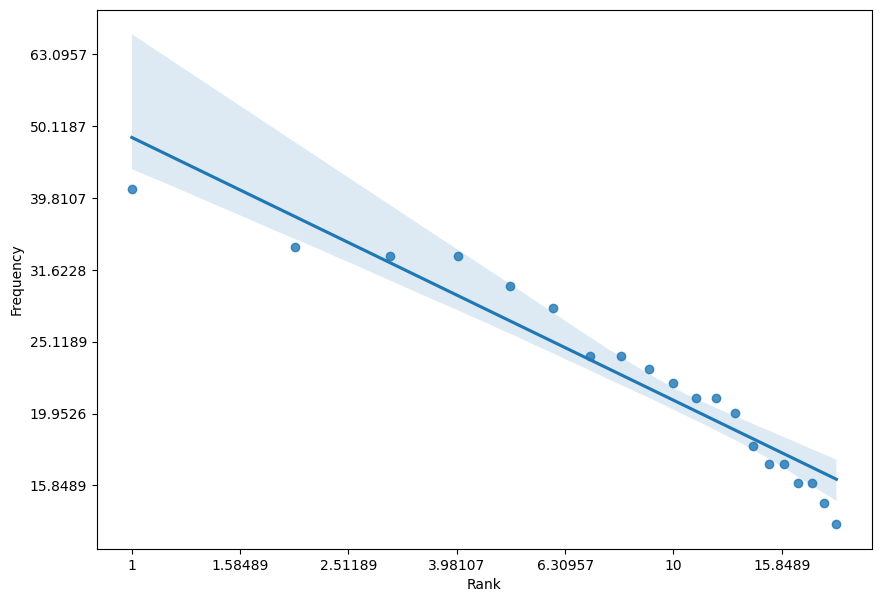

In [6]:
import pandas as pd
import math
import operator

zipWords = []

frequency = []
# source: https: // github.com/stopwords-iso/stopwords-fr/blob/master/stopwords-fr.txt
# Vaihto tassa kielien valilla
for act in noStopwEN:
    for line in act:
        for word in line:
            zipWords.append(word)

frequency = {}

for word in zipWords:
    count = frequency.get(word, 0)
    frequency[word] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame(columns=column_header)
collection = sorted(frequency.items(),
                    key=operator.itemgetter(1), reverse=True)

for word, freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1

f, ax = plt.subplots(figsize=(10, 7))


g = sns.regplot(x="Rank", y="Frequency",  data=np.log10(
    df[:20].astype('float64')), ax=ax)


def formatter(x, pos): return f'{10 ** x:g}'


ax.get_xaxis().set_major_formatter(formatter)
ax.get_yaxis().set_major_formatter(formatter)

kuva = g.get_figure()
fig.savefig("out.png")


## Task 5

> 5.  Now we want to assess the coherence each line of English corpus with its counterpart in French corpus. Consider FastText embedding, see Word vectors for 157 languages · fastText, which is available for several languages. Write a script that calculates the embedding of the whole line as the average of the FastText embedding of individual words constituting the line. For French corpus, you should use the French embedding available from the above link. Now given the word embedding of a given line in English and its corresponding in French corpus, the consistency score is calculated as the cosine similarity between the two embedding vector. Then, display in a graph the variation of the consistency score for the whole corpus. Report in a table the mean, standard deviation, kurtosis and skewness values of the consistency scores.


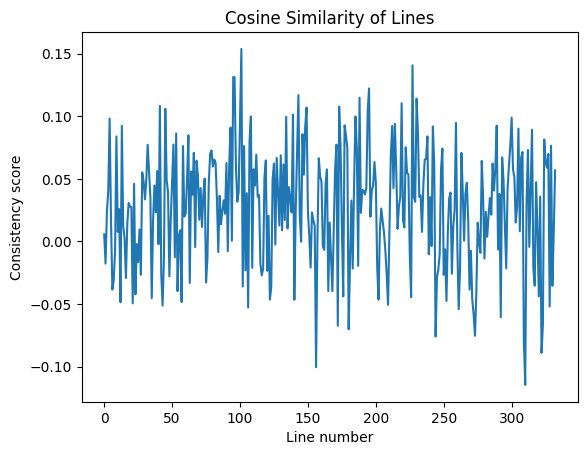

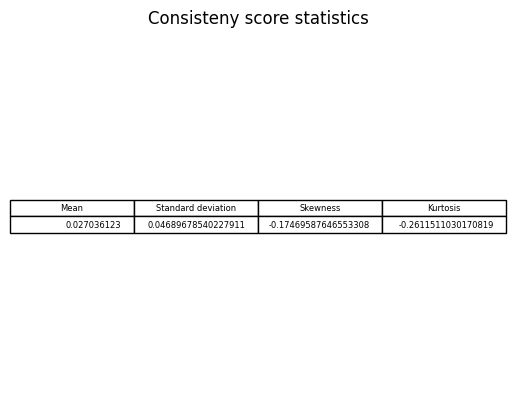

In [7]:
# separate script (embedding.py) that only works on linux, recommended atleast 8GB of RAM
# gives out similarity scores in similarities.pickle

from statistics import mean, stdev
import scipy

try:
    # load cosine similarities of whole lines
    with open('similarities.pickle', 'rb') as f:
        similarities_withnan = pickle.load(f)
except:
    print('No pickle file(s) found')

# similarities without nan values
similarities = [x for x in similarities_withnan if str(x) != 'nan']


# calculate table values
mean = mean(similarities)
std_dev = stdev(similarities)
skew = scipy.stats.skew(similarities, axis=0, bias=True)
kurtosis = scipy.stats.kurtosis(similarities, axis=0, fisher=True, bias=True)
# plot a table
plt.plot(similarities)
plt.title('Cosine Similarity of Lines')
plt.ylabel('Consistency score')
plt.xlabel('Line number')
plt.show()
plt.table(cellText=[[mean, std_dev, skew, kurtosis]],
          colLabels=['Mean', 'Standard deviation', 'Skewness', 'Kurtosis'], loc='center')
plt.axis('off')
plt.title('Consisteny score statistics')
plt.show()


## Task 6.

> We want to test the coherence in terms of sentiment analysis score. For this purpose, use Textblob sentiment analyzer as it supports several languages (see example at French Sentiment Analysis Using TextBlob | Kaggle, which outputs for a given text input, positive, negative or neutral). For each line of English and French corpus, output the overall sentiment score. Then assign a Boolean output of 1 if the sentiment of both lines match and zero, otherwise. Draw the (0-1) histogram showing the proportion of matches and mismatches.


In [8]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import re
import spacy
import string
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())


senti_listEN, senti_listFR = [], []
lines_sentiEN, lines_sentiFR = [], []

# TODO: tokensEN sisältää mitä?
for act in tokensEN:
    for j, line in enumerate(act):
        lineSentiment = 0
        print("line {} which contains: {}".format(j, line))
        for i in line:
            vs = tb(i).sentiment[1]
            if (vs > 0):
                print("word "+i+" is positive")
                senti_listEN.append('Positive')
                lineSentiment = + vs
            elif (vs < 0):
                print("word "+i+" is negative")
                senti_listEN.append('Negative')
                lineSentiment = - vs
            else:
                #print("word "+i+" is neutral")
                senti_listEN.append('Neutral')
                lineSentiment = - vs
        print("This particular lines sentiment is: {}".format(lineSentiment))
        lines_sentiEN.append(lineSentiment)


for act in tokensFR:
    for j, line in enumerate(act):
        lineSentiment = 0
        print("line {} which contains: {}".format(j, line))
        for i in line:
            vs = tb(i).sentiment[1]
            if (vs > 0):
                print("word "+i+" is positive")
                senti_listFR.append('Positive')
                lineSentiment = + vs
            elif (vs < 0):
                print("word "+i+" is negative")
                senti_listFR.append('Negative')
                lineSentiment = - vs
            else:
                #print("word "+i+" is neutral")
                senti_listFR.append('Neutral')
                lineSentiment = - vs
        print("This particular lines sentiment is: {}".format(lineSentiment))
        lines_sentiFR.append(lineSentiment)


dataEN = senti_listEN
dataSentiEN = lines_sentiEN

dataFR = senti_listFR
dataSentiFR = lines_sentiFR


line 0 which contains: ['a', 'little', 'more', 'than', 'kin', 'and', 'less', 'than', 'kind']
This particular lines sentiment is: -0.0
line 1 which contains: ['not', 'so', 'my', 'lord', 'i', 'am', 'too', 'much', 'in', 'the', 'sun']
This particular lines sentiment is: -0.0
line 2 which contains: ['ay', 'madam', 'it', 'is', 'common']
This particular lines sentiment is: -0.0
line 3 which contains: ['seems', 'madam', 'nay', 'it', 'is', 'i', 'know', 'not', 'seems', 'tis', 'not', 'alone', 'my', 'inky', 'cloak', 'good', 'mother', 'nor', 'customary', 'suits', 'of', 'solemn', 'black', 'nor', 'windy', 'suspiration', 'of', 'forced', 'breath', 'no', 'nor', 'the', 'fruitful', 'river', 'in', 'the', 'eye', 'nor', 'the', 'dejected', 'havior', 'of', 'the', 'visage', 'together', 'with', 'all', 'forms', 'moods', 'shapes', 'of', 'grief', 'that', 'can', 'denote', 'me', 'truly', 'these', 'indeed', 'seem', 'for', 'they', 'are', 'actions', 'that', 'a', 'man', 'might', 'play', 'but', 'i', 'have', 'that', 'withi

In [9]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dataEN, name="EN"))
fig.add_trace(go.Histogram(x=dataFR, name="FR"))

# Overlay both histograms
fig.update_layout()
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()


fig3 = px.line(dataSentiEN, title='Line sentiment in English')
fig4 = px.line(dataSentiFR, title='Line sentiment in French')


fig3.show()
fig4.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Task 7


In [ ]:
from nltk.draw.dispersion import dispersion_plot
import nltk
from collections import Counter

sortedCountEN = Counter(wordsEN)
sortedCountFR = Counter(lemmaFR)

topN = 5


# Todo: fuse to 1 plot? -was difficult to make details out
plot = plt.figure(figsize=(12, 9))
targetsEN = [word for word, cnt in sortedCountEN.most_common(topN)]
dispersion_plot(wordsEN, targets, ignore_case=True,
                title='Lexical Dispersion Plot EN')

plot2 = plt.figure(figsize=(12, 9))
targetsFR = [word for word, cnt in sortedCountFR.most_common(topN)]
dispersion_plot(lemmaFR, targetsFR, ignore_case=True,
                title='Lexical Dispersion Plot FR', )



## Task 8

>8.	Consider the 5 most common tokens (excluding the stopwords, numbering and uncommon characters) for each corpus. Draw the histogram showing the number of occurrences of each these tokens. Use a two-bar representation to the scores for English and French corpus. The equivalence of the histograms would indicate the one-to-one equivalence of these common words too. Now we want to evaluate the ordering of appearance of these common words. Write a script that would allow you to determine the proportion of permutations that co-occur in English and French corpus. This is somehow similar to kendal’s tau, which quantifies correlation between some reference ordering and automatic order (Check Python statistical library for further information). 

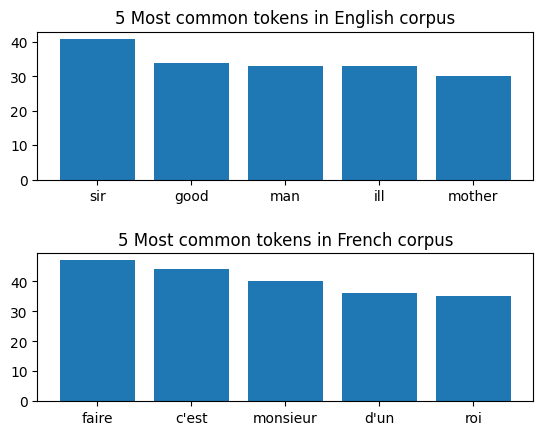

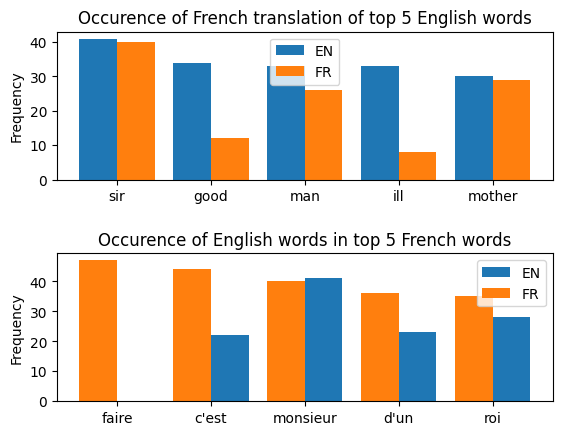

In [33]:
from collections import Counter

def remove_act_separation(wordlist):
    final_list = []
    for act in wordlist:
        for line in act:
            for word in line:
                final_list.append(word)
    return final_list
            
    
#Counter() creates a dictionary with the words as keys and their frequency as values
freqEN = Counter(remove_act_separation(noStopwEN))
freqFR = Counter(remove_act_separation(noStopwFR))

# top 100 most common words
top100EN = freqEN.most_common(100)
top100FR = freqFR.most_common(100)

# top 5 wrods in each languageillmother
top5EN = freqEN.most_common(5)
top5FR = freqFR.most_common(5)

#make subplots
fig, axs = plt.subplots(2)
axs[0].bar(range(len(top5EN)), [val[1] for val in top5EN], align='center')
axs[0].set_title('5 Most common tokens in English corpus')
axs[0].set_xticks(range(len(top5EN)))
axs[0].set_xticklabels([val[0] for val in top5EN])  # give labels to x-axis
axs[1].bar(range(len(top5FR)), [val[1] for val in top5FR], align='center')
axs[1].set_title('5 Most common tokens in French corpus')
axs[1].set_xticks(range(len(top5FR)))
axs[1].set_xticklabels([val[0] for val in top5FR])
plt.subplots_adjust(hspace=0.5)

plt.show()

# top 5 words for english = sir, good, man, ill, mother
# equivalent for french = monsieur, bon(ne), homme, mal, mere

# these were searched manually using google translate
pair_to_EN = [('monsieur', 40), ('bonne', 12), ('homme', 26), ('mal', 8), ('mère', 29)]

# top 5 words for french = faire, c'est, monsieur, d'un, roi
# equivalent for english = x, 'tis, sir, thy, king
pair_to_FR = [('(not available)', 0), ('tis', 22), ('sir', 41), ('thy', 23), ('king', 28)]

fig, axs = plt.subplots(2)

X_axis = np.arange(len(top5EN))
axs[0].bar(X_axis - 0.2, [val[1] for val in top5EN], 0.4, label = 'EN')
axs[0].bar(X_axis + 0.2, [val[1] for val in pair_to_EN], 0.4, label = 'FR')
axs[0].set_xticks(X_axis, [val[0] for val in top5EN])
axs[0].set_ylabel("Frequency")
axs[0].set_title("Occurence of French translation of top 5 English words")
axs[0].legend()

axs[1].bar(X_axis + 0.2, [val[1] for val in pair_to_FR], 0.4, label = 'EN')
axs[1].bar(X_axis - 0.2, [val[1] for val in top5FR], 0.4, label = 'FR')
axs[1].set_xticks(X_axis, [val[0] for val in top5FR])
axs[1].set_ylabel("Frequency")
axs[1].set_title("Occurence of English words in top 5 French words")
axs[1].legend()
plt.subplots_adjust(hspace=0.5)
plt.show()
    
    


## Task 9

>9.	We want to see how the common tokens vary in terms of number of syllables. You may use python library Pyphen, to determine the number of syllables of each word. Write a script that calculates the number of syllables for the 100 common tokens in both corpus, and suggest a diagram how the two corpuses compare in terms of number of syllables of their most common tokens.   

In [ ]:
import pyphen

num_of_syllablesEN = []
num_of_syllablesFR = []

# count syllables in each word
for token in top100EN:
    num_of_syllablesEN.append(pyphen.Pyphen(lang='en').inserted(token[0]).count('-') + 1)
for token in top100FR:
    num_of_syllablesFR.append(pyphen.Pyphen(lang='fr').inserted(token[0]).count('-') + 1)

# Count the frequency of syllables
syllable_freqEN = Counter(num_of_syllablesEN)
syllable_freqFR = Counter(num_of_syllablesFR)

fig, axs = plt.subplots(2)
axs[0].bar(range(len(syllable_freqEN)), [val for val in syllable_freqEN.values()], align='center')
axs[0].set_title('Syllable frequency in English corpus')
axs[0].set_xticks(range(len(syllable_freqEN)))
axs[0].set_xticklabels([val for val in syllable_freqEN.keys()])
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Number of syllables')
axs[1].bar(range(len(syllable_freqFR)), [val for val in syllable_freqFR.values()], align='center')
axs[1].set_title('Syllable frequency in French corpus')
axs[1].set_xticks(range(len(syllable_freqFR)))
axs[1].set_xticklabels([val for val in syllable_freqFR.keys()])
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Number of syllables')
plt.show()